<style type="text/css">
    h1 {color:darkorange;}
    h2 {color:royalblue;}
    h3 {color:steelblue;}
    blockquote {
        padding-left: 0.25em;
        border-left: 10px solid orange;
        margin: 1.5em 10px;
        max-width: 80%
        padding: 0.5em 10px;
    }
    blockquote:before {
        padding-left: 0.25em;
        margin-right: 0.25em;
        vertical-align: -0.4em;
    }
    blockquote p {
        padding-left: 0.25em;
        margin: 1.5em 10px;
        display: inline;
    }
</style>


#  Covid-19 Project

Patrick Ruff

Matthew Reeves

Kaggle Dataset: [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)

---

## Introduction

The Covid-19 pandemic has affected all of our lives in one way or another. Loved ones or friends are left isolated in quarentine or for worst. Or for many of us, we found a new norm of no longer traveling to an office, but to traveling to a virtual space. Due to the amount of data that is being presented to the public about the infection data science can help to provide infection rate patterns or predict infection risks. This project is an attempt to understand the virus and hopefully predict a better future.

### Goals

1. Be able to target individual's survival rate or assess their risk of infection
2. Forcast the rate of infection

## Imports

In [2]:
import IPython
import IPython.display
import numpy   as np
import pandas  as pd
import seaborn as sns
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
from glob                    import glob
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble        import RandomForestClassifier
from sklearn.tree            import DecisionTreeClassifier, plot_tree
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.ensemble        import GradientBoostingClassifier
from matplotlib              import pyplot as plt
from termcolor               import colored
from sklearn.metrics         import (
    classification_report, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    confusion_matrix, 
    precision_recall_curve, 
    average_precision_score
)
from sklearn.model_selection import train_test_split, cross_val_score
import tensorflow as tf

# Data Exploration

The chosen dataset provided eight CSVs for consumption. From a quick look, each file has a range of 8 to 27 to 45 features. *COVID19_open_line_list.csv* has the largest amount of features with a total of **14126 records**. Although, nine of the columns can be removed as they are unamed and have 0 data. This is consistant through the covid prefixed files.  *COVID19_open_line_list.csv* file has only a features with than 1,000 records. 

- covid_19_data.csv
- COVID19_open_line_list.csv
- COVID19_line_list_data.csv

As for the remainder of the files, the time series files describe a sumation of confirmed, deaths and recoveries of the virus for each day from January 22 to November 20. 

- time_series_covid_19_confirmed_US.csv
- time_series_covid_19_deaths_US.csv
- time_series_covid_19_recovered.csv
- time_series_covid_19_deaths.csv
- time_series_covid_19_confirmed.csv


In [5]:
DFS = {}
for name in glob('data/*'): 
    DFS[name] = pd.read_csv(name, sep=',')

## Untrainable Data

### COVID19_open_line_list

Unfortunately, *COVID19_open_line_list*, which seemed to be the most promising to start the analysis, ended up being only useful for data visualization and not any predictive analysis. This file shows the true nature of capturing data within an uncontrolled environment and with the chaos of the virus. Most of the features are either empty or has mixed data types. The biggest issue found, was the classification feature. **Outcome**, only had ~200 non-null entries. This made the dataset unusable in the sense of virus classification.

In [3]:
data = pd.read_csv('data/COVID19_open_line_list.csv', sep=',').drop_duplicates()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13175 entries, 0 to 13174
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13173 non-null  float64
 1   age                       1349 non-null   object 
 2   sex                       1264 non-null   object 
 3   city                      10194 non-null  object 
 4   province                  12906 non-null  object 
 5   country                   13148 non-null  object 
 6   wuhan(0)_not_wuhan(1)     13170 non-null  float64
 7   latitude                  13147 non-null  float64
 8   longitude                 13147 non-null  float64
 9   geo_resolution            13147 non-null  object 
 10  date_onset_symptoms       746 non-null    object 
 11  date_admission_hospital   730 non-null    object 
 12  date_confirmation         13089 non-null  object 
 13  symptoms                  493 non-null    object 
 14  lives_

In [4]:
print(pd.Categorical(data['outcome']).categories)
print(data['outcome'].value_counts())

Index(['05.02.2020', 'Discharged',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'critical condition, intubated as of 14.02.2020', 'death', 'died',
       'discharge', 'discharged', 'recovered', 'severe', 'stable',
       'treated in an intensive care unit (14.02.2020)'],
      dtype='object')
stable                                                                      78
discharge                                                                   45
discharged                                                                  37
death                                                                       12
died                                                                         3
recovered                                                                    2
Discharged                                                                   2
critical condition, intubated as of 14.02.2020                               1
05.02.2020                   

> Here is an example of what cleaning is needed for a single feature. Age, included numbers, ranges, fractions or was empty. In the end, 11849 records were invalid and required filling in.

In [5]:

data = data.drop(columns=['ID'])
data = data.drop(columns=['source'])
data = data.drop(columns=['sequence_available'])
data = data.drop(columns=['Unnamed: 33'])
data = data.drop(columns=['Unnamed: 34'])
data = data.drop(columns=['Unnamed: 35'])
data = data.drop(columns=['Unnamed: 36'])
data = data.drop(columns=['Unnamed: 37'])
data = data.drop(columns=['Unnamed: 38'])
data = data.drop(columns=['Unnamed: 39'])
data = data.drop(columns=['Unnamed: 40'])
data = data.drop(columns=['Unnamed: 41'])
data = data.drop(columns=['Unnamed: 42'])
data = data.drop(columns=['Unnamed: 43'])
data = data.drop(columns=['Unnamed: 44'])

data['age']                      = data['age'].str.lower()
data['sex']                      = data['sex'].str.lower()
data['city']                     = data['city'].str.lower()
data['province']                 = data['province'].str.lower()
data['country']                  = data['country'].str.lower()
data['geo_resolution']           = data['geo_resolution'].str.lower()
data['date_onset_symptoms']      = data['date_onset_symptoms'].str.lower()
data['date_admission_hospital']  = data['date_admission_hospital'].str.lower()
data['date_confirmation']        = data['date_confirmation'].str.lower()
data['symptoms']                 = data['symptoms'].str.lower()
data['lives_in_Wuhan']           = data['lives_in_Wuhan'].str.lower()
data['travel_history_dates']     = data['travel_history_dates'].str.lower()
data['travel_history_location']  = data['travel_history_location'].str.lower()
data['reported_market_exposure'] = data['reported_market_exposure'].str.lower()
data['additional_information']   = data['additional_information'].str.lower()
data['chronic_disease']          = data['chronic_disease'].str.lower()
data['outcome']                  = data['outcome'].str.lower()
data['date_death_or_discharge']  = data['date_death_or_discharge'].str.lower()
data['notes_for_discussion']     = data['notes_for_discussion'].str.lower()
data['location']                 = data['location'].str.lower()
data['admin3']                   = data['admin3'].str.lower()
data['admin2']                   = data['admin2'].str.lower()
data['admin1']                   = data['admin1'].str.lower()
data['country_new']              = data['country_new'].str.lower()
data['admin_id']                 = data['admin_id'].str.lower()
data['data_moderator_initials']  = data['data_moderator_initials'].str.lower()

data = data[data.sex != '4000']

def find_mid(a, b):
    return int((a + b) / 2)

for age in data['age']:
    if age in [str(i) for i in range(1, 100)]:
        data['age'] = data['age'].replace(age, int(age))

data['age'] = data['age'].replace('0-10', find_mid(0, 10))
data['age'] = data['age'].replace('0-18', find_mid(0, 18))
data['age'] = data['age'].replace('0-6', find_mid(0, 16))
data['age'] = data['age'].replace('0.08333', 1)
data['age'] = data['age'].replace('0.25', 1)
data['age'] = data['age'].replace('0.5', 1)
data['age'] = data['age'].replace('0.58333', 1)
data['age'] = data['age'].replace('1.75', 1)
data['age'] = data['age'].replace('10-19', find_mid(10, 19))
data['age'] = data['age'].replace('13-19', find_mid(13, 19))
data['age'] = data['age'].replace('16-80', find_mid(16, 80))
data['age'] = data['age'].replace('18-65', find_mid(18, 65))
data['age'] = data['age'].replace('19-77', find_mid(19, 77))
data['age'] = data['age'].replace('20-29', find_mid(20, 29))
data['age'] = data['age'].replace('21-72', find_mid(21, 72))
data['age'] = data['age'].replace('22-80', find_mid(22, 80))
data['age'] = data['age'].replace('23-72', find_mid(23, 72))
data['age'] = data['age'].replace('27-40', find_mid(27, 27))
data['age'] = data['age'].replace('30-39', find_mid(30, 39))
data['age'] = data['age'].replace('36-45', find_mid(36, 45))
data['age'] = data['age'].replace('38-68', find_mid(38, 68))
data['age'] = data['age'].replace('40-49', find_mid(40, 49))
data['age'] = data['age'].replace('40-89', find_mid(40, 89))
data['age'] = data['age'].replace('50-59', find_mid(50, 59))
data['age'] = data['age'].replace('60-60', find_mid(60, 60))
data['age'] = data['age'].replace('60-69', find_mid(60, 69))
data['age'] = data['age'].replace('70-79', find_mid(70, 79))
data['age'] = data['age'].replace('8-68', find_mid(8, 68))
data['age'] = data['age'].replace('80-80', find_mid(80, 80))
data['age'] = data['age'].replace('80-89', find_mid(80, 89))
data['age'] = data['age'].replace('80-89', find_mid(80, 89))
data['age'] = data['age'].replace(np.nan, data['age'].mean())
data['age'] = data['age'].astype(int)

data['sex'] = data['sex'].replace('', 'unknown')
data['sex'] = data['sex'].replace(np.nan, 'unknown')
print(data['age'].value_counts())

45    11849
54       63
64       63
47       59
48       58
      ...  
14        1
96        1
83        1
3         1
87        1
Name: age, Length: 86, dtype: int64


### COVID19_line_list_data

Again, this file, did not contain any trainable information and seemed to be more of an extension of the previous file, containing notes and little data. 


In [7]:
data = pd.read_csv('data/COVID19_line_list_data.csv', sep=',').drop_duplicates()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 27 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

# Time Series Confirmed Forecast Prediction

## Data Preperation

Due to the time series files were broken out into sumations of a respective feature, the first step was combining all of the datasets into a single dataframe. This was done by reading each file into their own dataframe. Then for each day, the sum for recoveries, confirms and deaths were appended to a respective array. Including the mortality rate of that day and the date. Then finally each array was added to a single dataframe. 

The final result is a dataframe thats 5 features wide with 299 records. 

In [8]:
features  = DFS['data\\time_series_covid_19_confirmed.csv'].columns
confirmed = DFS['data\\time_series_covid_19_confirmed.csv'].loc[:, features[4]:features[-1]]
recovered = DFS['data\\time_series_covid_19_recovered.csv'].loc[:, features[4]:features[-1]]
deaths    = DFS['data\\time_series_covid_19_deaths.csv'].loc[:, features[4]:features[-1]]
df = pd.DataFrame()
data = {
    'dates'          : [],
    'confirmed'      : [],
    'deaths'         : [],
    'recoveries'     : [],
    'mortality-rate' : []
}

for feature in features[4:]:
    data['dates'].append(feature)
    data['confirmed'].append(confirmed[feature].sum())
    data['deaths'].append(deaths[feature].sum())
    data['recoveries'].append(recovered[feature].sum())
    data['mortality-rate'].append(deaths[feature].sum() / confirmed[feature].sum())

df['observationDate'] = data['dates']
df['confirmed']       = data['confirmed']
df['deaths']          = data['deaths']
df['recoveries']      = data['recoveries']
df['mortality']       = data['mortality-rate'] 
df['observationDate'] = pd.to_datetime(df['observationDate']).astype(np.int64)/ 10**9

print(df.head())
print(df.shape)

   observationDate  confirmed  deaths  recoveries  mortality
0     1.579651e+09        555      17          28   0.030631
1     1.579738e+09        654      18          30   0.027523
2     1.579824e+09        941      26          36   0.027630
3     1.579910e+09       1434      42          39   0.029289
4     1.579997e+09       2118      56          52   0.026440
(299, 5)


### Case Sumation Representation

The below is a representation of the compilation dataset:B

 - Blue : Confirmed Cases
 - Green : Recoveries 
 - Red : Deaths

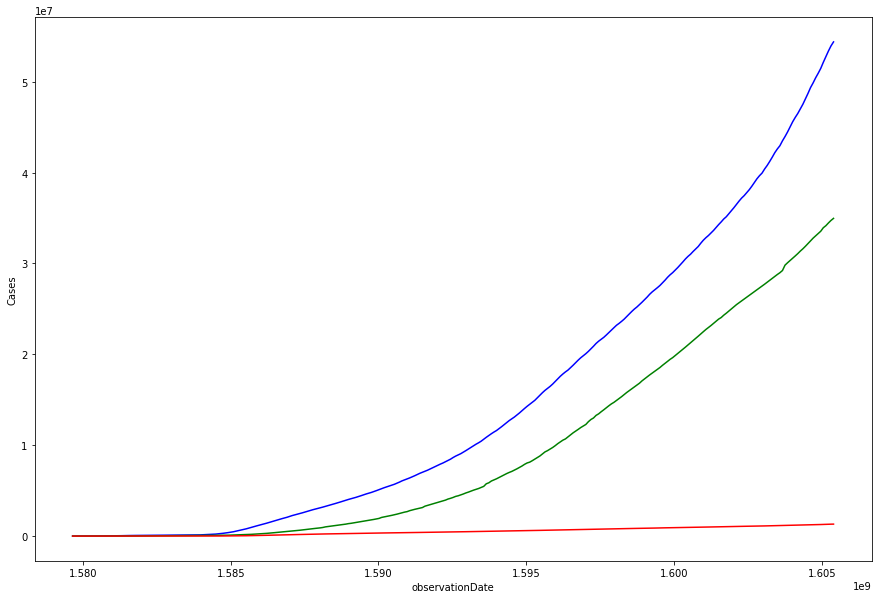

In [78]:
f, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x="observationDate", y="confirmed", data=df, color='b')
sns.lineplot(x="observationDate", y="recoveries", data=df, color='g')
sns.lineplot(x="observationDate", y="deaths", data=df, color='r')
plt.ylabel('Cases')
plt.show()

## Neural Networks

### Inputs and Labels Preperation

In order to create a series of inputs and labels, the below **SliceGenerator** class was used to map dataframes to tensor datasets. This is done by creatings input and label slices specified by the *slice_width* and *label_width* diamentions, with the interval specified by *shift*. A slice_width=7 and label_width=8 with shift=1 will create a series of input indicies of: `[0, 1, 2, 3, 4, 5, 6]` and label indicies of: `[1, 2, 3, 4, 5, 6, 7, 8]`. 

The ensemble function, compiles and fits a series of models for comparison. As the models are being compiled with a **MeanSquaredError()** loss, calculates the average squared difference between the predicted and the actual labels, the data is normalized by the following : `data - data.mean() / data.standard_deviation()`. This keeps the data between 1 and 0. 


In [79]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
MAX_EPOCHS = 50

In [80]:
class SliceGenerator():
    def __init__(self, df, slice_width, label_width, shift, label_columns=None):
        column_indices  = {name: i for i, name in enumerate(df.columns)}
        
        df              = (df - df.mean()) / df.std()
        n               = len(df)
        self._train     = df[          :int(n*0.7)] # take top 70% 
        self._validate  = df[int(n*0.7):int(n*0.9)] # take 70% - 90% = 20%
        self._test      = df[int(n*0.9):          ] # take the last 10%
        self.num_features = df.shape[1]

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}

        self.column_indices    = {name: i for i, name in enumerate(self._train.columns)}
        self.slice_width       = slice_width
        self.label_width       = label_width
        self.shift             = shift
        self.total_slice_size  = slice_width + shift
        self.input_slice       = slice(0, slice_width)
        self.input_indices     = np.arange(self.total_slice_size)[self.input_slice]
        self.label_start       = self.total_slice_size - self.label_width
        self.labels_slice      = slice(self.label_start, None)
        self.label_indices     = np.arange(self.total_slice_size)[self.labels_slice]
        
    @property
    def train_data(self):
        return self.to_dataset(self._train)

    @property
    def val_data(self):
        return self.to_dataset(self._validate)

    @property
    def test_data(self):
        return self.to_dataset(self._test)

    def to_dataset(self, data):
        def split_window(features):
            inputs = features[:, self.input_slice, :]
            labels = features[:, self.labels_slice, :]
            labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)  
            inputs.set_shape([None, self.slice_width, None])
            labels.set_shape([None, self.label_width, None])
            return inputs, labels
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_slice_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=30)
        ds = ds.map(split_window)
        return ds

    def plot(self, model, title, plot_col):
        inputs, labels = next(iter(self.train_data))
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        for n in range(min(1, len(inputs))):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)
            index = self.label_columns_indices.get(plot_col, None)
            plt.scatter(self.label_indices, labels[n, :, index], edgecolors='k', label='Labels', c='#00ff00', s=64)
            plt.scatter(self.label_indices, model(inputs)[n, :, index], marker='X', edgecolors='k', label='Predictions', c='#ff0000', s=64)
            if n == 0:
                plt.legend()
        plt.xlabel('Time [Days]')
        plt.title(title)

    def ensemble(self, models):
        _val_performance = {}
        _performance = {}
        _history = {}
        _models = {}
        for i, (name, model) in enumerate(models.items()):
            print()
            print('=' * 50)
            print()
            print(f'{name} running {model}')
            model.compile(
                loss=tf.losses.MeanSquaredError(), 
                optimizer=tf.optimizers.Adam(), 
                metrics=[tf.metrics.MeanAbsoluteError()]
            )
            history = model.fit(
                self.train_data, 
                batch_size=7,
                epochs=MAX_EPOCHS,
                validation_data=self.val_data, 
                callbacks=[
                    tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss', 
                            patience=2, 
                            mode='min'
                )]
            )
            _val_performance[name] = model.evaluate(self.val_data)
            _performance[name]     = model.evaluate(self.test_data, verbose=0)
            _history[name]         = history
            _models[name]          = model
            print()
            print('=' * 50)
            print()
        return _val_performance, _performance, _history, _models


> As there is limited data, the slice width is set to **55**. This gave the most trainable data. 

In [81]:
width=55
confirmed_slices = SliceGenerator(df, slice_width=width, label_width=width, shift=1, label_columns=['confirmed'])
deaths_slices    = SliceGenerator(df, slice_width=width, label_width=width, shift=1, label_columns=['deaths'])
recovered_slices = SliceGenerator(df, slice_width=width, label_width=width, shift=1, label_columns=['recoveries'])

The below models were chosen and defined by:

#### Linear Model

> As defined in [Keras API](https://keras.io/api/layers/core_layers/dense/), if no activation function is provided to a *Dense* layer, the layer becomes linear as, `a(x) = x`. Therefore, this model has a one to one maping, in to out. 

#### Dense Relu Models

> This model uses the **rectified linear activation function** activation function or in short relu. This function is defined by `max(x, 0)`, ouputing x if it is greater than 0. 

#### Dense sigmoid Models

> This model uses the **sigmoid** activation function, which returns small values as 0 and larger values as 1. Thus containing a binary return set: [0, 1].

In [82]:
val_performance, performance, history, models = confirmed_slices.ensemble({
    'linear' : tf.keras.Sequential([tf.keras.layers.Dense(units=1)]),
    'dense_relu' : tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ]),
    'dense_relu_2' : tf.keras.Sequential([
        tf.keras.layers.Dense(units=100, activation='relu'),
        tf.keras.layers.Dense(units=100, activation='relu'),
        tf.keras.layers.Dense(units=100, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ]),
    'dense_relu_3' : tf.keras.Sequential([
        tf.keras.layers.Dense(units=1000, activation='relu'),
        tf.keras.layers.Dense(units=10000, activation='relu'),
        tf.keras.layers.Dense(units=1000, activation='relu'),
        tf.keras.layers.Dense(units=1)
    ]),
    'dense_sig' : tf.keras.Sequential([
        tf.keras.layers.Dense(units=32, activation='sigmoid'),
        tf.keras.layers.Dense(units=32, activation='sigmoid'),
    ])
})



linear running <tensorflow.python.keras.engine.sequential.Sequential object at 0x186457dd0>
Epoch 1/50
6/6 [==============================] - 0s 45ms/step - loss: 0.0913 - mean_absolute_error: 0.2646 - val_loss: 0.1557 - val_mean_absolute_error: 0.3931
Epoch 2/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0803 - mean_absolute_error: 0.2488 - val_loss: 0.1424 - val_mean_absolute_error: 0.3761
Epoch 3/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0713 - mean_absolute_error: 0.2351 - val_loss: 0.1299 - val_mean_absolute_error: 0.3595
Epoch 4/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0633 - mean_absolute_error: 0.2222 - val_loss: 0.1182 - val_mean_absolute_error: 0.3431
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.0562 - mean_absolute_error: 0.2101 - val_loss: 0.1073 - val_mean_absolute_error: 0.3271
Epoch 6/50
6/6 [==============================] - 0s 19ms/step - loss: 0.0498 - mean_absolute_error: 

### Predictions

The results, as shown below, provided some interesting observations. The linear model and the low density neutral network provided nearly the same result, but inversed. Both models to gain a lower mean error, ~0.0776, around 30 inputs, but as more inputs were provided the mean error grew. We can expect that this would continue if more data was available. As for the highly dense and sigmoid models, no data point hit the mark and was by far the worst models with a mean error of ~1.0921. 

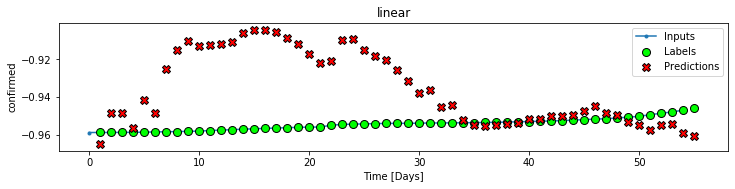

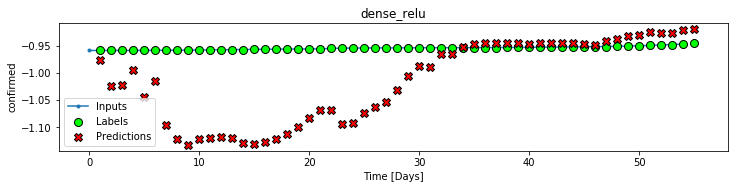

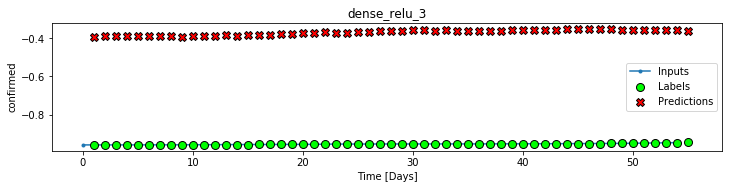

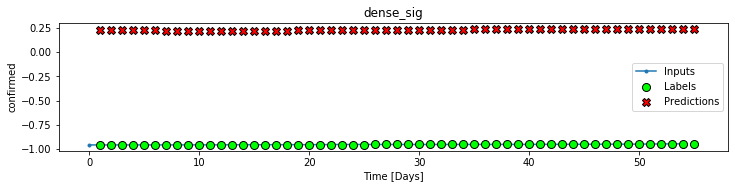

In [83]:
confirmed_slices.plot(models['linear'], 'linear', 'confirmed')
confirmed_slices.plot(models['dense_relu'], 'dense_relu',  'confirmed')
confirmed_slices.plot(models['dense_relu_3'], 'dense_relu_3', 'confirmed')
confirmed_slices.plot(models['dense_sig'], 'dense_sig', 'confirmed')

The best performing was the **dense_relu_2**, containing three relu layers with 100 units. From the output below, the mean error gets tighter and tighter as more data is presented. After 40 datapoints, the model is nearly on target with a final mean error of 0.0136. With another month of data this model would start to fair quite well in predictions for future cases. 

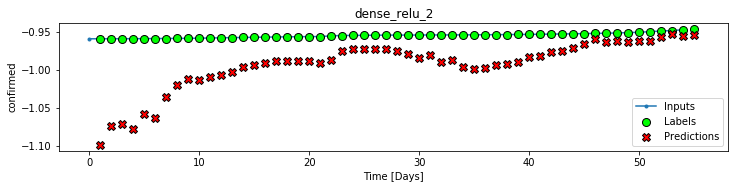

In [84]:
confirmed_slices.plot(models['dense_relu_2'], 'dense_relu_2', 'confirmed')

# Random Forest - Predicting the Futures Confirmed Cases


## Overview
Random Forest machine learning algorithm was chosen over Gradient Boosting machine learning algorithm because Random Forest achieves more accurate results for noisier data. The data worked with was all unique values making Random Forest a better fit.

By itself Random Forest is not effective as a time series machine learning algorithm. To make the Random Forest algorithm utilize data from different dates we added data from previous dates to the same row. The amount of previous dates added to the same row can be configured by changing the "daysPrev" variable.  

To determine the amount of confirmed COVID cases, there is a configurable variable "futurePred" which determines the amount of days in the future to predict. 

Several tests were ran using a basic random forest model to determine which combination of "daysPrev" and "confirmedF" lead to the most accurate estimation of covid cases.

After the ideal combination of "daysPrev" and "futurePred" was computated another random forest algorithm was ran to fine tune the hyperparameters using GridSearchCv

## Prediction

It was predicted that the most accurate/useful test results would be when
"daysPrev" = 14 and "futurePred" = 14.

This is a prediction based on the incubation time of the virus which is anywhere from 2-14 days. This is also based on the observation that after large gatherings of people the cases tend to spike up a few weeks later.

## Goal
The goal was to be able to predict the correct bin at least 70% of the time when each feature is broken up to 80 bins.    

In [240]:
import warnings
warnings.filterwarnings('ignore')

def RunRandomForest():
    # Splitting data into x and y
    X = df3.drop('confirmedF', axis=1).copy();
    y = df3['confirmedF'].copy();

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    params = {
                'n_estimators':[50], 'max_depth':[10], 'min_samples_split':[4]
             }
        
    clf = GridSearchCV(RandomForestClassifier(), params)
    clf = clf.fit(X_train_std, y_train)
    clf_pred = clf.predict(X_train_std)
    
    return round(clf.best_score_*100, 2)

The Random Forest model above is a basic model with no hyper parameter tuning. This is used to quickly test combinations of "daysPrev" and "futurePred".

In [241]:
def RunRandomForestTune():
    # Splitting data into x and y
    X = df3.drop('confirmedF', axis=1).copy();
    y = df3['confirmedF'].copy();

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)
    
    params = {
                'n_estimators':[50, 100,150, 200], 'max_depth':[None, 10, 20], 'min_samples_split':[1,2,3,4],
                'max_features':[3,4,5,6,7], 'max_features' : ['auto', 'log2'],
                    'class_weight' : ['balanced', 'balanced_subsample']
             }
        
    t0 = time()
    clf = GridSearchCV(RandomForestClassifier(), params)
    clf = clf.fit(X_train_std, y_train)
    print ("training time:", round(time()-t0, 3), "s")
    t1 = time()
    clf_pred = clf.predict(X_train_std)
    print ("predict time:", round(time()-t1, 3), "s")
    
    print(f"Accuracy for best GBM: {round(clf.best_score_*100, 2)}%")

    for key, val in clf.best_params_.items():
        print(f"Best hyperparameter is {key}: {val}")

This Random Forest model above uses GridSearchCV to tune the machine learning algorithm.

In [242]:
def BinData(data, numOfBins):
    npData = np.array(data, dtype=int) 
    numBins = numOfBins
    max = npData.max();
    min = npData.min();    
    multiplier = int((max-min)/numBins);
    
    for i in range(0,len(npData)):
        for j in range(1,numBins+1):
            if(npData[i] < multiplier * j):
                npData[i] = int(((multiplier*j) + (multiplier*(j-1)))/2);
                break;
            if(j == numBins):
                npData[i] = int(((multiplier*j) + (multiplier*(j-1)))/2);
    return npData;

Having all unique values made GridSearchCV and CrossValidation impossible to run because it could not use folds. To workaround the issue a simple BinData method was implemented. The BinData method does not return a range of values, instead it returns an integer that is the center of the range bin.

In [243]:
rfFinalResults = []

PrevDaysLoop = 14;

#Note: This value represents the amount of days past 10. Ex 5 means 10-14 will be tested
FutureConfirmLoop = 5;

for future in range(0,FutureConfirmLoop):
    rfResults = []
    for prev in range(0,PrevDaysLoop):    
        df2 = pd.DataFrame();
        df3 = pd.DataFrame();
        numOfBins = 80;
        daysPrev = prev+1;
        futurePred = future+10;
        
        df2['confirmed']       = BinData(data['confirmed'], numOfBins)
        df2['deaths']          = BinData(data['deaths'], numOfBins)
        df2['recoveries']      = BinData(data['recoveries'], numOfBins)

        df3['confirmed'] = df2['confirmed'][daysPrev:len(df)-(futurePred)].tolist()
        df3['deaths'] = df2['deaths'][daysPrev:len(df)-(futurePred)].tolist()
        df3['recoveries'] = df2['recoveries'][daysPrev:len(df)-(futurePred)].tolist()
        
        for i in range(1, daysPrev+1):
            confirmedPrev = "confirmedPrev" + str(i)
            deathsPrev = "deathsPrev" + str(i)
            recoveriesPrev = "recoveriesPrev" + str(i)
            df3[confirmedPrev] = df2['confirmed'][(daysPrev-i):len(df)-(futurePred+i)].tolist()
            df3[deathsPrev] = df2['deaths'][(daysPrev-i):len(df)-(futurePred+i)].tolist()
            df3[recoveriesPrev] = df2['recoveries'][(daysPrev-i):len(df)-(futurePred+i)].tolist()

        df3['confirmedF'] = df2['confirmed'][futurePred+daysPrev:len(df)].tolist()
        
        rfResults.append(RunRandomForest());
            
    rfFinalResults.append(rfResults);

The above code is where the configurable variables 'daysPrev' and 'futurePred' are. 

In order to get every combination for the basic randomforest model prediction these configuration variables get set by a for loop and a nested for loop.

For accurate results, each combination is run ten times and the accuracy for that combination is set to the mean of the results.

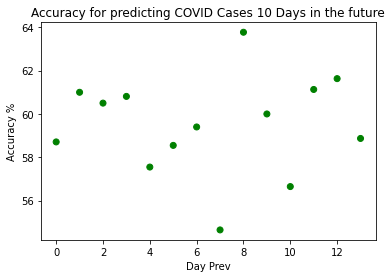

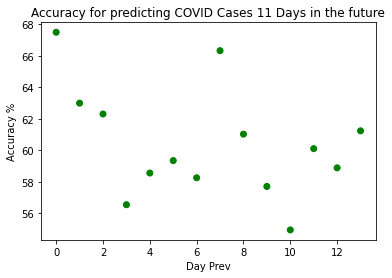

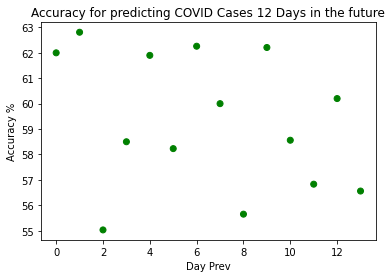

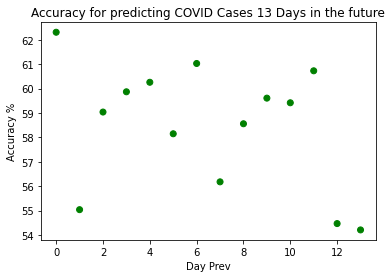

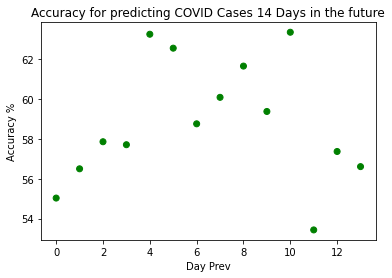

In [244]:
for i in range(0,len(rfFinalResults)):

    plotArray = rfFinalResults[i];

    x = [];

    y = [];

    z = [];

    for j in range(0, len(plotArray)):
        x.append(j);

    for j in range(0, len(plotArray)):
        y.append(plotArray[j]);

    for j in range(0, len(plotArray)):
        z.append("Green");

    plt.scatter(x, y, c=z);

    plt.xlabel("Day Prev")
    plt.ylabel("Accuracy %")

    title = "Accuracy for predicting COVID Cases " + str(i+10) + " Days in the future"
    plt.title(title)

    #red_patch = mpatches.Patch(color='red', label='No Disease')
    #green_patch = mpatches.Patch(color='green', label='Disease')

    # To show the plot
    plt.show()

The above graphs show the accuracy depending on the combination of "futurePred" and "daysPrev"

# Results

|Days in the Future Predicted | Days Previous Used | Accuracy %|
|---|---|---|
|10|8|64
|11|0|67
|12|1|63
|13|11|60
|14|10|63

The table above summarized the best combinations of "futurePred" and "daysPrev"

It can be observed that when "futurePred" is lower than "daysPrev" for the highest accuracy.

This makes sense because to predict confirmed cases further in the future you need more data. Whereas if you are predicting closer future confirmed covid covid cases the extra data might confuse the machine learning algorithm.


The goal was just about met to have higher than 70% accuracy when split up into 80 bins. 


In [246]:
df2 = pd.DataFrame();
df3 = pd.DataFrame();
numOfBins = 80;
daysPrev = 10;
futurePred = 14;

df2['confirmed']       = BinData(data['confirmed'], numOfBins)
df2['deaths']          = BinData(data['deaths'], numOfBins)
df2['recoveries']      = BinData(data['recoveries'], numOfBins)

df3['confirmed'] = df2['confirmed'][daysPrev:len(df)-(futurePred)].tolist()
df3['deaths'] = df2['deaths'][daysPrev:len(df)-(futurePred)].tolist()
df3['recoveries'] = df2['recoveries'][daysPrev:len(df)-(futurePred)].tolist()

for i in range(1, daysPrev+1):
    confirmedPrev = "confirmedPrev" + str(i)
    deathsPrev = "deathsPrev" + str(i)
    recoveriesPrev = "recoveriesPrev" + str(i)
    df3[confirmedPrev] = df2['confirmed'][(daysPrev-i):len(df)-(futurePred+i)].tolist()
    df3[deathsPrev] = df2['deaths'][(daysPrev-i):len(df)-(futurePred+i)].tolist()
    df3[recoveriesPrev] = df2['recoveries'][(daysPrev-i):len(df)-(futurePred+i)].tolist()

df3['confirmedF'] = df2['confirmed'][futurePred+daysPrev:len(df)].tolist()

RunRandomForestTune();

training time: 195.92 s
predict time: 0.008 s
Accuracy for best GBM: 69.33%
Best hyperparameter is class_weight: balanced
Best hyperparameter is max_depth: 20
Best hyperparameter is max_features: auto
Best hyperparameter is min_samples_split: 4
Best hyperparameter is n_estimators: 50


### Tuning hyperparameter
It was decided that the most accurate/most useful combination of days prev and future prediction was 14 days in the future predicted and 10 days previously used. After being tuned the percentage accuracy jumped from 63% to 69%.

## Random Forest Final Analysis

There was a definitive trend to where the further out you were trying to predict the covid cases the lower the percentage.

It was also noticed that the further out you were trying to rpedict the covid cases the more days prev needed

There was one instance where no days previous yielded the highest accuracy

While these tests begin to scratch the surface for predicting covid cases in the future. The sample size was too small. With only 300 rows we can begin to predict but the results are not as strong. 

This jumbled mess of COVID data is the reason why making predictions are so difficult.

Hopefully better quality data gets gathered in future pandemics so machine learning can be used to make data predictions.